In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import nbinom
import scipy
from tqdm import tqdm
%matplotlib inline

# Data

The data is fetched directly from Sciensao's spreadsheet, and consolidated with @vdwnico's original values for the beginning of the time-series.

In [148]:
def consolidate(v1, v2):
    v1 = {k:v for k, v in v1}
    v2 = {k:v for k, v in v2}
    v2.update(v1)
    return [(k, v) for k, v in v2.items()]

In [149]:
# Hospitalizations
nico_hosps = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14,
    27), (15, 97), (16, 163), (17, 265), (18, 368), (19, 496), (20,
    649), (21, 842), (22, 1097), (23, 1381), (24, 1644), (25,
    1881), (26, 2138), (27, 2718), (28, 3072), (29, 3644), (30,
    4081), (31, 4474), (32, 4886), (33, 4979), (34, 5210), (35,
    5362), (36, 5497), (37, 5514), (38, 5606), (39, 5744), (40,
    5699), (41, 5597), (42, 5618), (43, 5645), (44, 5419), (45,
    5423), (46, 5536), (47, 5515), (48, 5309), (49, 5161), (50,
    5069), (51, 4871), (52, 4920), (53, 4976), (54, 4765), (55, 
    4527)] # last == April 22
    
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_hosps = df.groupby("DATE")["TOTAL_IN"].sum()   # start on March 15
sciensano_hosps = [(i+17, v) for i, v in enumerate(sciensano_hosps)]
hosps = consolidate(sciensano_hosps, nico_hosps)

In [150]:
# ICUs
nico_icus = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 2), (14,
    15), (15, 24), (16, 33), (17, 53), (18, 79), (19, 100), (20,
    130), (21, 164), (22, 238), (23, 290), (24, 322), (25, 381), (26,
    474), (27, 605), (28, 690), (29, 789), (30, 867), (31, 927), (32,
    1021), (33, 1088), (34, 1144), (35, 1205), (36, 1245), (37,
    1261), (38, 1267), (39, 1260), (40, 1276), (41, 1285), (42,
    1278), (43, 1262), (44, 1232), (45, 1234), (46, 1226), (47,
    1204), (48, 1182), (49, 1140), (50, 1119), (51, 1081), (52,
    1071), (53, 1079), (54, 1020), (55, 993)]  # last == April 22
  
df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="HOSP")
sciensano_icus = df.groupby("DATE")["TOTAL_IN_ICU"].sum()   # start on March 15
sciensano_icus = [(i+17, v) for i, v in enumerate(sciensano_icus)]
icus = consolidate(sciensano_icus, nico_icus)

In [151]:
# Daily deaths
nico_deaths = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7,
    0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 1), (14,
    3), (15, 3), (16, 5), (17, 5), (18, 10), (19, 10), (20, 19), (21,
    25), (22, 27), (23, 36), (24, 46), (25, 75), (26, 69), (27,
    91), (28, 91), (29, 115), (30, 128), (31, 133), (32, 158), (33,
    172), (34, 238), (35, 193), (36, 224), (37, 269), (38, 225), (39,
    267), (40, 299), (41, 321), (42, 275), (43, 323), (44, 283), (45,
    338), (46, 270), (47, 262), (48, 266), (49, 240), (50, 191), (51,
    98), (52, 22), (53, 170), (54, 266), (55, 230)]  # last == April 22

df = pd.read_excel("https://epistat.sciensano.be/Data/COVID19BE.xlsx", sheet_name="MORT")
sciensano_deaths = df.groupby("DATE")["DEATHS"].sum()   # start on March 10
sciensano_deaths = [(i+12, v) for i, v in enumerate(sciensano_deaths)]
deaths = consolidate(sciensano_deaths, nico_deaths)

In [152]:
deaths[-5:]

[(52, 216), (53, 196), (54, 149), (55, 110), (56, 17)]

In [153]:
# Convert to pandas 
data = pd.DataFrame({
    "n_hospitalized": [i for _ , i in hosps],
    "n_icu": [i for _, i in icus],
    "n_daily_deaths": [i for _, i in deaths]
}, index=range(1, len(hosps)+1))

data["n_deaths"] = data["n_daily_deaths"].cumsum()

In [154]:
data.head(30)

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0
10,0,0,0,0


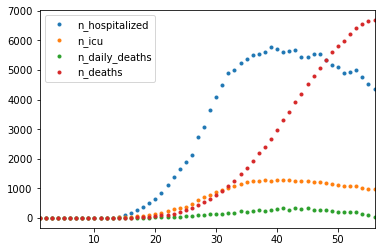

In [155]:
data.plot(style=".")

In [156]:
data.describe()

,n_hospitalized,n_icu,n_daily_deaths,n_deaths
count,56.000000,56.000000,56.000000,56.000000
mean,2868.910714,631.160714,119.267857,1907.089286
std,2403.370438,534.221737,116.580911,2348.449564
min,0.000000,0.000000,0.000000,0.000000
25%,79.500000,21.750000,3.000000,7.250000
50%,3363.500000,739.500000,92.500000,582.000000
75%,5247.750000,1153.500000,226.250000,3658.000000
max,5759.000000,1285.000000,339.000000,6679.000000


# SEIR model

Python re-implementation of Nicolas' original SEIR model.

In [157]:
# Parameters
frac_dh = 2985 / 6490  # deaths in hospitals / total deaths
window = 6          # size of the window for fitting Re's
hh = 0.05           # fraction of hospitalized 
gamma = 1 / 12.4    # inverse recovery time
epsilon = 1 / 5.2   # inverse incubation time 
dea = 0.5           # fatality rate in icu 
n0 = 11000000       # population size
n0_MRS = 400000     # Population en MR/MRS + personnel soignant

In [158]:
def SEIR(r0, i0=3, gg=0.75):
    n_days = len(r0)
    
    drea = dea * 1 / 5
    rrea = (1 - dea) * 1 / 20
    n = [n0]
    i = [i0]
    e = [i[-1] * 37]
    h = [0.0]
    l = [0.0]
    r = [0.0]
    m = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    hospi = 0.0
    
    for day in range(n_days):
        lam = gamma * r0[day]
        
        if day == 14:
            hospi = hh / 7
            
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - gamma * i[-1] - hospi * i[-1]
        dh = hospi * i[-1] - gg * h[-1] / 7 - (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300))
        dl = (1 - gg) * h[-1] / (4 + 2 * np.tanh((l[-1]-500)/300)) - drea * l[-1] - rrea * l[-1]
        dr = gamma * i[-1] + rrea * l[-1] + gg * h[-1] / 7
        dm = drea * l[-1] 
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        h.append(h[-1] + dh)
        l.append(l[-1] + dl)
        if l[-1] > 1895:
            dm = dm + (l[-1] - 1895)
            l[-1] = 1895
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + h[-1] + l[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(h), np.array(l), np.array(m), np.array(r)

def SEIR_MRS(r0_mrs):
    n_days = len(r0_mrs)
    
    alpha = 0.15 / 10
    lam = gamma * 4.3
    n = [n0_MRS]
    i = [1]
    e = [i[-1]*20]
    r = [0.0]
    s = [n[-1] - e[-1] - i[-1] - r[-1]]
    m = [0.0]
    
    for day in range(n_days):
        lam = gamma * r0_mrs[day]
        
        ds = -lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1]
        de = lam * (i[-1] / 2 + e[-1]) * s[-1] / n[-1] - epsilon * e[-1]
        di = epsilon * e[-1] - (gamma + alpha) * i[-1]
        dr = gamma * i[-1]
        dm = alpha * i[-1]
        
        s.append(s[-1] + ds)
        e.append(e[-1] + de)
        i.append(i[-1] + di)
        r.append(r[-1] + dr)
        m.append(m[-1] + dm)
        n.append(s[-1] + e[-1] + i[-1] + r[-1])
        
    return np.array(s), np.array(e), np.array(i), np.array(m), np.array(r)

# Parameter fit

The procedure is different from Nicolas'. All parameters are fit jointly, instead of using a greedy procedure to fit parameters sequentially. Results are therefore slightly different.

In [159]:
from scipy.optimize import minimize

In [160]:
def pack(r0, r0_rms, i0, gg, sigmas):
    v = np.zeros(len(r0) + len(r0_rms) + 2 + 4)
    v[:len(r0)] = r0
    v[len(r0):len(r0)+len(r0_rms)] = r0_rms
    v[len(r0)+len(r0_rms):len(r0)+len(r0_rms)+4] = sigmas
    v[-2] = i0
    v[-1] = gg
    return v 

def unpack(v):
    return v[:(len(v)-2-4)//2], v[(len(v)-2-4)//2:len(v)-2-4], v[-2], v[-1], v[-6:-2]

def smoothen(v, n_pts=5):
    box = np.ones(n_pts) / n_pts
    return np.convolve(v, box, mode="same")

## Choice of noise model

In [164]:
from scipy.special import factorial
import scipy.special as sc
import math

In [417]:
def gaussian_noise_sample(mu, sigma):
    return np.random.randn(len(mu)) * sigma + mu

def gaussian_error(x, mu, sigma):
    return ((x - mu)/sigma)**2 + np.log(2*math.pi*sigma**2)

def poisson_noise_sample(mu, sigma):
    return np.random.poisson(mu)

def poisson_error(x, mu, sigma):
    #print(sc.gammaln(x.astype(int)))
    # Not possible to directly use the probability mass function because of zero and factorial that explodes for 
    #large numbers.
    return -(x*np.log(mu.astype(float) + 1e-10)-mu-sc.gammaln(x.astype(float) +  + 1e-10))

# Warning! We should learn an overdispersion parameter
def neg_binom_sample(mu, sigma):
    sigma = (mu + 1) * 1.2
    p = 1 - mu/sigma
    r = mu*(1-p)/p
    return nbinom.rvs(r, p, size=1)

def neg_binom_error(x, mu, sigma):
    x, mu = x + 1, mu + 1
    sigma_2 = mu + mu * sigma
    p = (sigma_2 - mu)/sigma_2
    r = (mu**2)/(sigma_2 - mu) + 1
    #print(x.astype(int), r.astype(int), p)
    return -nbinom.logpmf(x.astype(int), r.astype(int), p)


In [418]:
noise_sampler = {"Gaussian": gaussian_noise_sample,
                 "Poisson": poisson_noise_sample,
                 "Neg_Binom": neg_binom_sample}

noise_error = {"Gaussian": gaussian_error,
               "Poisson": poisson_error,
               "Neg_Binom": neg_binom_error}

In [422]:
def fit_seir_parameters(data, noise="Gaussian", use_sigma=False):
    error_f = noise_error[noise]
    # For now we don't fit the sigma but compute it a priori. We also suppose it is constant for all t.
    if use_sigma and noise != "Neg_Binom":
        sigma_h, sigma_icu, sigma_death = data.mean()[['n_hospitalized', 'n_icu', 'n_deaths']]/10
        sigma_death = sigma_death*frac_dh
        sigma_death_mrs = sigma_death*(1 - frac_dh)
    elif noise == "Neg_Binom":
        sigma_h, sigma_icu, sigma_death, sigma_death_mrs = [.5]*4
    else:
        sigma_h, sigma_icu, sigma_death, sigma_death_mrs = [1.1]*4
    sigmas = [sigma_h, sigma_icu, sigma_death, sigma_death_mrs]
    def cost(x):
        # parameters
        r0, r0_mrs, i0, gg, sigmas = unpack(x)
        if use_sigma:
            sigma_h, sigma_icu, sigma_death, sigma_death_mrs = sigmas
        else:
            sigma_h, sigma_icu, sigma_death, sigma_death_mrs = 1., 1., 1., 1.
        # smoothen the values
        # --> kind of "compensate" for the greedy procedure and coarse grid
        r0 = smoothen(r0)
        r0_mrs = smoothen(r0_mrs)

        # make the last r0s identical
        r0 = np.concatenate((r0, np.array([r0[-1]] * window)))
        r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * window)))

        c = 0.0
        
        offset = 0 if noise != "Gaussian" else 0
        
        # fit on hosp+icus+deaths with SEIR
        s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
        # Evaluate the parameters likelihood
        # Hospitalized
        c += error_f(x=data["n_hospitalized"].values[9 + offset:],
                     mu=h[10 + offset:]+l[10 + offset:], 
                     sigma=sigma_h).sum()
        # ICU
        c += error_f(x=data["n_icu"].values[9 + offset:], 
                     mu=l[10 + offset:], sigma=sigma_icu).sum()
        # Deaths
        c += error_f(x=frac_dh * data["n_deaths"].values[9 + offset:-2],
                     mu=m[10 + offset:-2],
                     sigma=sigma_death).sum()

        # fit on deaths with SEIR_MRS
        s, e, i, m_mrs, r = SEIR_MRS(r0_mrs)
        c += error_f(x=data["n_deaths"].values[offset:-2], 
                     mu=m[1 + offset:-2] + m_mrs[1 + offset:-2], 
                     sigma=sigma_death_mrs).sum()

        # ^ we omit the last two death data points, because not consolidated yet
        return c


    r0 = [4.3] * (len(data) - window)
    r0_rms = [4.3] * (len(data) - window)
    i0 = 3.0
    gg = 0.75
    
    bounds = []
    for _ in range(len(r0)):
        bounds.append((0.3, 5.0))
    for _ in range(len(r0_rms)):
        bounds.append((0.3, 6.3))
    for s in sigmas:
        if noise != "Neg_Binom":
            bounds.append((1, s))
        else:
            bounds.append((.001, 1.))
    bounds.append((1, 50))
    bounds.append((0.65, 0.85))
    x0 = pack(r0, r0_rms, i0, gg, sigmas)

    res = minimize(cost, x0=x0, bounds=bounds, options={"maxfun": 100000})
    r0, r0_mrs, i0, gg, sigmas = unpack(res.x)
    r0 = smoothen(r0)
    r0_mrs = smoothen(r0_mrs)
    return r0, r0_mrs, i0, gg, sigmas

In [423]:
r0, r0_mrs, i0, gg, sigmas = fit_seir_parameters(data, noise="Neg_Binom", use_sigma=True)

In [424]:
r0, r0_mrs, i0, gg, sigmas

(array([2.58185501, 3.44185501, 4.30185501, 4.30061834, 4.30061834,
        4.3       , 4.3       , 4.3       , 4.3       , 4.30123668,
        4.30185501, 4.30185501, 4.30185501, 4.30185501, 4.30061834,
        4.3       , 4.3       , 4.30123668, 4.30185501, 4.30247335,
        4.30247335, 4.30247335, 4.30123668, 4.30123668, 4.30061834,
        4.30061834, 4.30061834, 4.30123668, 4.30061834, 4.30123668,
        4.30123668, 4.30123668, 4.30061834, 4.30123668, 4.30061834,
        4.30061834, 4.30247335, 4.30247335, 4.30185501, 4.30185501,
        4.30185501, 4.3       , 4.3       , 4.3       , 4.3       ,
        4.3       , 4.30123668, 4.30123668, 3.44123668, 2.58123668]),
 array([2.58      , 3.44      , 4.3       , 4.3       , 4.3       ,
        4.3       , 4.3       , 4.3       , 4.3       , 4.3       ,
        4.3       , 4.3       , 4.3       , 4.3       , 4.3       ,
        4.3       , 4.3       , 4.3       , 4.3       , 4.3       ,
        4.3       , 4.3       , 4.3       , 4.

(2, 3)


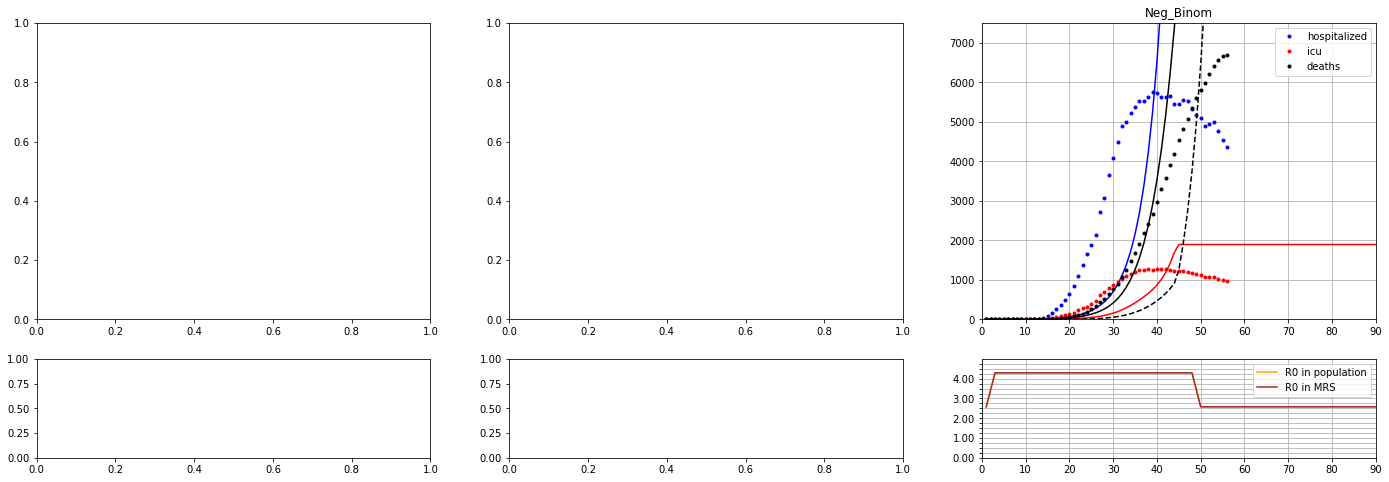

In [413]:
# Plots
fig, ax = plt.subplots(2, len(noise_error), figsize=(8*len(noise_error), 8), gridspec_kw={"height_ratios": (3,1)})
print(ax.shape)
for i, noise_model in enumerate(noise_error.keys()):
    if noise_model != "Neg_Binom":
        continue
    r0, r0_mrs, i0, gg, sigmas = fit_seir_parameters(data, noise=noise_model, use_sigma=True)
    #r0 = smoothen(r0)
    #r0_mrs = smoothen(r0_mrs)

    n_futures = 365
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    s, e, _, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
    _, _, _, m_mrs, _ = SEIR_MRS(r0_mrs)

    n_days = len(data)

    ax[0, i].set_title(noise_model)
    ax[0, i].plot(range(1, n_days+1 + n_futures), h[1:]+l[1:], c="b")
    ax[0, i].plot(range(1, n_days+1), data["n_hospitalized"].values, ".", c="b", label="hospitalized")
    ax[0, i].plot(range(1, n_days+1 + n_futures), l[1:], c="r")
    ax[0, i].plot(range(1, n_days+1), data["n_icu"].values, ".", c="r", label="icu")
    ax[0, i].plot(range(1, n_days+1 + n_futures), m[1:] + m_mrs[1:], c="k")
    ax[0, i].plot(range(1, n_days+1 + n_futures), m[1:], "--", c="k")
    ax[0, i].plot(range(1, n_days+1), data["n_deaths"].values, ".", c="k", label="deaths")
    ax[0, i].grid()
    ax[0, i].set_ylim(0, 7500)
    ax[0, i].set_xlim(0, 90)
    ax[0, i].legend()

    ax[1, i].plot(range(1, n_days+1 + n_futures), r0, c="orange", label="R0 in population")
    ax[1, i].plot(range(1, n_days+1 + n_futures), r0_mrs, c="brown", label="R0 in MRS")
    ax[1, i].grid(which="both")
    ax[1, i].set_ylim(0, 5)
    ax[1, i].set_yticks(np.arange(0, 5, step=0.25))

    for j, l in enumerate(ax[1, i].get_yticklabels()):
        if j % 4 != 0:
            l.set_visible(False)
    ax[1, i].set_xlim(0, 90)
    ax[1, i].legend()

plt.show()

In [55]:
def seir_sim(theta, noise="Gaussian", n_futures=-1):
    r0, r0_mrs, i0, gg, sigmas = theta
    sigma_h, sigma_icu, sigma_death, sigma_death_mrs = sigmas
    r0 = np.concatenate((r0, np.array([r0[-1]] * (window + n_futures))))
    r0_mrs = np.concatenate((r0_mrs, np.array([r0_mrs[-1]] * (window + n_futures))))
    s, e, i, h, l, m, r = SEIR(r0, i0=i0, gg=gg)
    _, _, _, m_mrs, _ = SEIR_MRS(r0_mrs)
    noise_f = noise_sampler[noise]
    tmp_data = pd.DataFrame({
        "n_hospitalized": noise_f(h[1:] + l[1:], sigma=sigma_h),
        "n_icu": noise_f(l[1:], sigma=sigma_icu),
        "n_deaths": noise_f(m[1:] + m_mrs[1:], sigma=sigma_death)
    }, index=range(1, len(m)))
    # add poisson
    return tmp_data

In [20]:
from joblib import Parallel, delayed

In [21]:
def parallel_param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=True, noise_sim='Gaussian', nb_iter=1000):
    theta_hat = fit_seir_parameters(data, noise=noise_fit, use_sigma=use_sigma_fit)
    thetas_bootstrap = []
    all_data = []
    def job_f(sim_data):
        return fit_seir_parameters(sim_data, noise=noise_fit, use_sigma=use_sigma_fit)
    thetas_bootstrap = Parallel(n_jobs=-1, verbose=11)(delayed(job_f)(seir_sim(theta_hat, noise_sim)) for i in range(nb_iter))

    return thetas_bootstrap

In [23]:
def param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=True, noise_sim='Gaussian', nb_iter=1000):
    theta_hat = fit_seir_parameters(data, noise=noise_fit, use_sigma=use_sigma_fit)
    thetas_bootstrap = []
    all_data = []
    for i in tqdm(range(nb_iter)):
        sim_data = seir_sim(theta_hat, noise_sim)
        all_data.append(sim_data)
        thetas_bootstrap.append(fit_seir_parameters(sim_data, noise=noise_fit, use_sigma=use_sigma_fit))
    return thetas_bootstrap, all_data

In [71]:
def plot(thetas_bootstrap, noise, obs_data=None, title='', name=''):
    n_futures = 30
    alpha=0.2
    fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": (3,1)})
    data_mean = 0.
    data_mean_2 = 0.
    r0_mean, r0_mrs_mean = 0., 0.
    r0_mean2, r0_mrs_mean2 = 0., 0.
    all_data = []
    all_r0 = []
    for i, theta in enumerate(thetas_bootstrap):
        r0, r0_mrs, i0, gg, sigmas = theta
        data_sim = seir_sim(theta, noise=noise, n_futures=n_futures)
        if i == 0:
            columns = data_sim.columns
        all_data += [data_sim]
        all_r0 += [np.concatenate((r0.reshape(-1, 1), r0_mrs.reshape(-1, 1)), 1)]
    all_data = np.dstack(all_data)
    all_r0 = np.dstack(all_r0)


    n_days = len(data_sim)
    fig.suptitle(title)
    colors = ["b", "r", "k"]
    #return
    for i, key in enumerate(columns):
        median = np.percentile(all_data[:, i, :], 50, axis=1)
        p10 = np.percentile(all_data[:, i, :], 10, axis=1)
        p90 = np.percentile(all_data[:, i, :], 90, axis=1)
        ax[0].plot(range(1, n_days+1), median, c=colors[i], label=key)
        ax[0].fill_between(range(1, n_days+1), p10, p90, color=colors[i], alpha=.2)
        if obs_data is not None:
            ax[0].plot(range(1, len(obs_data[key].values)+1), obs_data[key].values, ".", c=colors[i], alpha=.5)

    ax[0].grid()
    ax[0].set_ylim(0, 7000)
    ax[0].set_xlim(0, 80)
    colors = ["orange", "brown"]
    labels = ["R0 in population", "R0 in MRS"]
    for i in range(2):
        median = np.percentile(all_r0[:, i, :], 50, axis=1)
        p10 = np.percentile(all_r0[:, i, :], 5, axis=1)
        p90 = np.percentile(all_r0[:, i, :], 95, axis=1)
        ax[1].plot(range(1, median.shape[0]+1), median, c=colors[i], label=labels[i])
        ax[1].fill_between(range(1, median.shape[0]+1), p10, p90, color=colors[i], alpha=.2)
    ax[1].grid()
    ax[1].set_xlim(0, 80)
    if i == 0:
        ax[0].legend()
        ax[1].legend()

    plt.savefig("nicolas-reimpl-bootstrap-%s.png" % name)
    plt.show()

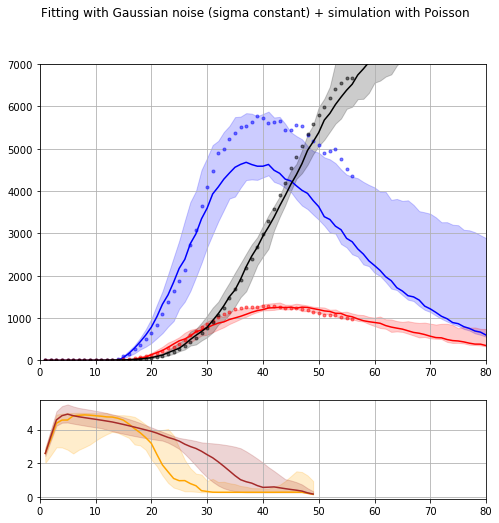

In [72]:
plot(thetas2, 'Poisson', data, 'Fitting with Gaussian noise (sigma constant) + simulation with Poisson', "GP")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   22.6s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   35.8s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   48.9s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   51.6s remaining:   51.6s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.1min remaining:   43.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.2min remaining:   31.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  1.3min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


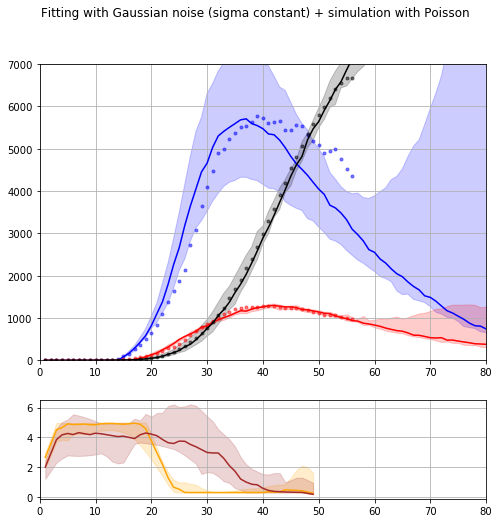

In [73]:
thetas2 = parallel_param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=True, noise_sim='Gaussian', 
                                     nb_iter=10)
plot(thetas2, 'Poisson', data, 'Fitting with Gaussian noise (sigma constant) + simulation with Poisson', "GP")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

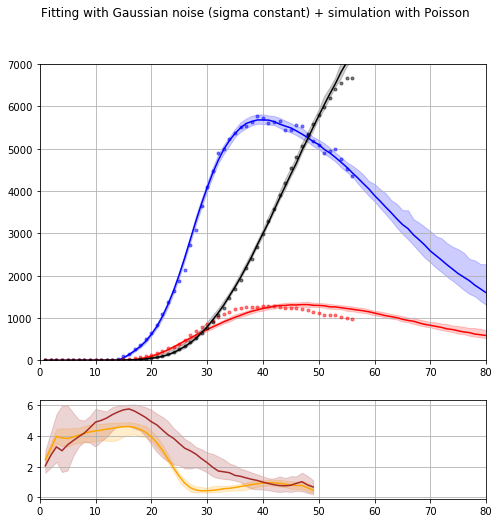

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

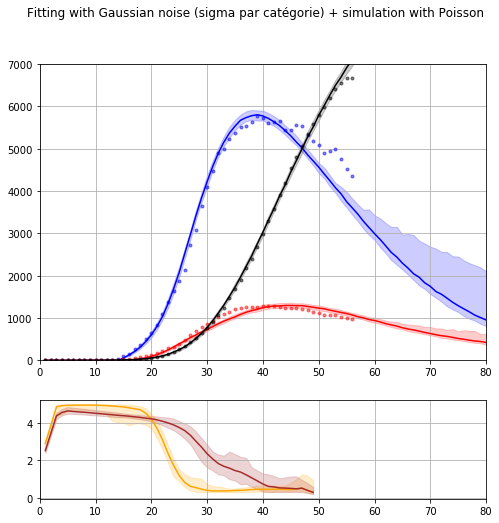

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

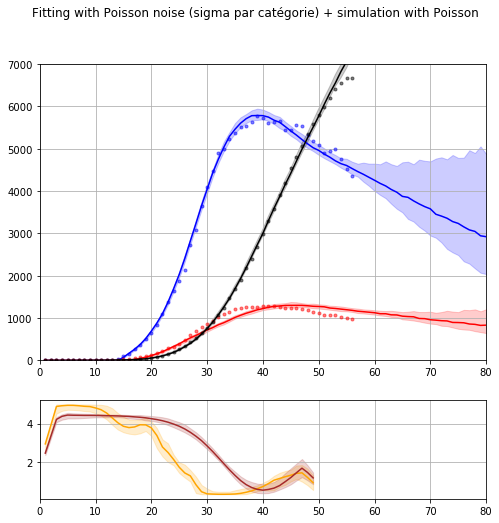

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

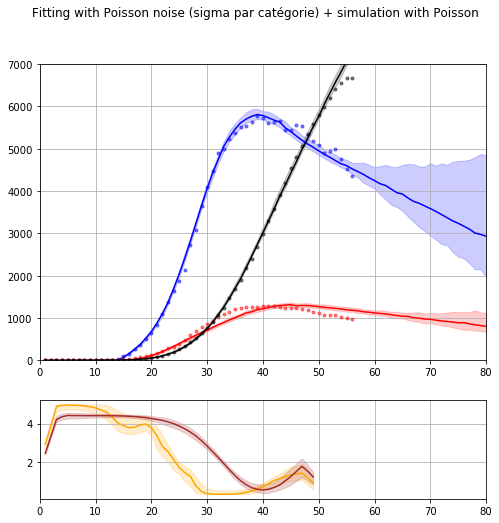

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

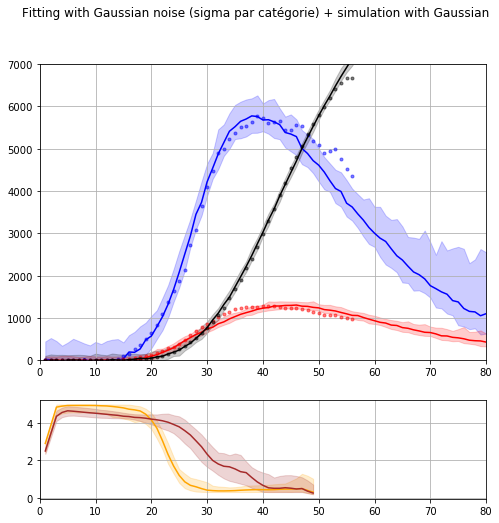

In [89]:
#thetas1 = parallel_param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=False, noise_sim='Poisson', 
#                                     nb_iter=100)
plot(thetas1, 'Poisson', data, 'Fitting with Gaussian noise (sigma constant) + simulation with Poisson', "GP")

#thetas2 = parallel_param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=True, noise_sim='Poisson', 
#                                     nb_iter=100)
plot(thetas2, 'Poisson', data, 'Fitting with Gaussian noise (sigma par catégorie) + simulation with Poisson', "GsP")

#thetas3 = parallel_param_bootstrap(data, noise_fit='Poisson', use_sigma_fit=True, noise_sim='Poisson', 
#                                     nb_iter=100)
plot(thetas3, 'Poisson', data, 'Fitting with Poisson noise + simulation with Poisson', "PP")

#thetas4 = parallel_param_bootstrap(data, noise_fit='Gaussian', use_sigma_fit=True, noise_sim='Gaussian', 
#                                     nb_iter=100)
plot(thetas4, 'Gaussian', data, 'Fitting with Gaussian noise (sigma par catégorie) + simulation with Gaussian', "GsG")
